In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, linalg
import os
import sys

In [82]:
#print(os.getcwd())

df = pd.read_csv("C:\\Users\\Stav\\Desktop\\school\\2\\Research\\n\\DataBase-main\\data_sdeDavid_without_outlires.csv").rename(columns={"mean_prctile33": "prctile33", "mean_three_ring": "mean_third_ring",
                                                                                             "median_three_ring": "median_third_ring",
                                                                                             "median_First_ring":"median_first_ring",
                                                                                             "mean_First_ring":"mean_first_ring",
                                                                                             "Meanci_1":"meanci_1",
                                                                                             "Meanci_2":"meanci_2"})

#print(df.head(5))

Data = df[df['Type']!= '']

#Data = Data[~np.isnan(df['Label'])]
print(len(Data))

#Data=Data.drop(['row','cluster_number',
#             'Tree_num','Longitude','Latitude','Std_plot','ID','RTK_Num'], axis=1)

Data = Data.dropna()
Data.info()



763
<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 762
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              763 non-null    int64  
 1   Type                    763 non-null    object 
 2   Plot                    763 non-null    object 
 3   Site_Name               763 non-null    object 
 4   mean                    763 non-null    float64
 5   min                     763 non-null    float64
 6   prctile5                763 non-null    float64
 7   max                     763 non-null    float64
 8   prctile95               763 non-null    float64
 9   std                     763 non-null    float64
 10  MTD                     763 non-null    float64
 11  median                  763 non-null    float64
 12  skewness                763 non-null    float64
 13  kurtosis                763 non-null    float64
 14  IQR                     763 non-null  

In [83]:
Data['mean'] = Data['mean'] - Data['AirTemp']
Data['min'] = Data['min'] - Data['AirTemp']
Data['prctile5'] = Data['prctile5'] - Data['AirTemp']
Data['max'] = Data['max'] - Data['AirTemp']
Data['prctile95'] = Data['prctile95'] - Data['AirTemp']
Data['median'] = Data['median'] - Data['AirTemp']
Data['meanci_1'] = Data['meanci_1'] - Data['AirTemp']
Data['meanci_2'] = Data['meanci_2'] - Data['AirTemp']
Data['prctile33'] = Data['prctile33'] - Data['AirTemp']
Data['mean_first_ring'] = Data['mean_first_ring'] - Data['AirTemp']
Data['mean_second_ring'] = Data['mean_second_ring'] - Data['AirTemp']
Data['mean_third_ring'] = Data['mean_third_ring'] - Data['AirTemp']
Data['mean_core'] = Data['mean_core'] - Data['AirTemp']
Data['median_first_ring'] = Data['median_first_ring'] - Data['AirTemp']
Data['median_second_ring'] = Data['median_second_ring'] - Data['AirTemp']
Data['median_third_ring'] = Data['median_third_ring'] - Data['AirTemp']
Data['median_core'] = Data['median_core'] - Data['AirTemp']
Data=Data.drop(['AirTemp'],axis=1)

KeyError: 'AirTemp'

In [71]:
Exclude_vars = ['Site_Name','Type','RTK_Num_All_Plots_Data','Plot_All_Plots_Data','RTK_Num','Label','Plot']
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 2 to 6476
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Label                   871 non-null    object 
 1   Plot                    871 non-null    object 
 2   Site_Name               871 non-null    object 
 3   mean                    871 non-null    float64
 4   min                     871 non-null    float64
 5   prctile5                871 non-null    float64
 6   max                     871 non-null    float64
 7   prctile95               871 non-null    float64
 8   std                     871 non-null    float64
 9   MTD                     871 non-null    float64
 10  median                  871 non-null    float64
 11  skewness                871 non-null    float64
 12  kurtosis                871 non-null    float64
 13  IQR                     871 non-null    float64
 14  MAD                     871 non-null    f

In [72]:
description=Data.describe(include='all')  
description

,Label,Plot,Site_Name,mean,min,prctile5,max,prctile95,std,MTD,...,mean_first_ring,mean_second_ring,mean_third_ring,mean_core,median_first_ring,median_second_ring,median_third_ring,median_core,CWSI,CWSI_minus_CWSI_of_row
count,871,871,871,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,...,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
unique,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Normal,A,Sde_David,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,359,696,871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.692770,1.151105,1.760643,13.654617,8.975700,2.236295,12.503512,...,3.990802,3.451898,2.810295,2.569524,3.195330,2.919264,2.649236,2.524270,0.198985,0.002109
std,NaN,NaN,NaN,0.780232,0.782446,0.713491,0.757854,0.865928,0.191127,0.803925,...,0.839179,0.907132,0.856301,0.884544,0.898943,0.822973,0.813431,0.891021,0.180285,0.157559
min,NaN,NaN,NaN,2.188699,-2.329686,0.360045,12.222610,6.544963,1.412572,8.009258,...,2.252408,1.240223,0.990285,0.625667,1.529818,1.219882,0.975025,0.685095,-0.149567,-1.209816
25%,NaN,NaN,NaN,3.148624,0.655115,1.269979,13.108660,8.336530,2.110614,12.091249,...,3.402512,2.813004,2.172313,1.971460,2.609974,2.369891,2.080008,1.914978,0.092009,-0.057048
50%,NaN,NaN,NaN,3.433355,1.080163,1.613342,13.297683,8.876064,2.220552,12.458740,...,3.794766,3.389716,2.693277,2.441788,2.940685,2.740080,2.535083,2.385077,0.155632,0.015832
75%,NaN,NaN,NaN,4.129939,1.580059,2.140054,14.144812,9.563392,2.365783,13.039736,...,4.444447,3.958527,3.268081,2.984709,3.637396,3.320284,3.030152,2.950165,0.275892,0.085552


# Respons variable

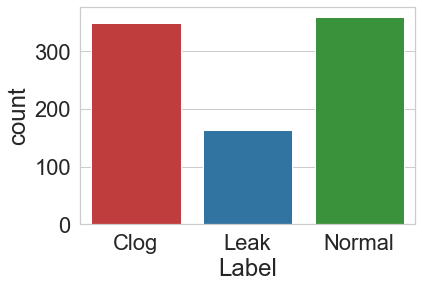

Normal    359
Clog      349
Leak      163
Name: Label, dtype: int64


In [73]:


sns.countplot(data=Data, x="Label",palette={"Leak":"tab:blue","Clog":"tab:red","Normal":"tab:green"})
plt.show()
s = df['Label'].value_counts()
print(s)

In [74]:
predictors = ['mean','median','prctile33','min','prctile5','max','prctile95', 'std', 'MAD',
'skewness','IQR','MTD','meanci_1','meanci_2','Diff_median_of_plot','Diff_mean_of_plot','Diff_std_of_plot', 
'Diff_median_of_row','Diff_mean_of_row','Diff_std_of_row', 'mean_first_ring', 'mean_second_ring',
'mean_third_ring','mean_core', 'median_first_ring','median_second_ring', 'median_third_ring',
'median_core','kurtosis','CWSI','CWSI_minus_CWSI_of_row']
##'CWSI', 'CWSI_minus_CWSI_of_row'
len(predictors)

31

# Histogramm, Boxplots, and Scatterplots with a regression lines

In [75]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

In [76]:
def disp_hue_regplot(Data):
    sns.set(font_scale=2)
    sns.set_style("whitegrid")
    import math
    rows_in_fig = 6
    a=rows_in_fig #len(predictors)
    b=3
    c=1
    var_number =1
    palette={"Leak":"tab:blue","Clog":"tab:red","Normal":"tab:green"} 
    # fig = plt.figure(figsize=(30,a*8))
    fig, axes = plt.subplots(a,b,figsize=(35,a*8))
    fig.tight_layout(h_pad=5)
    for i in Data[predictors]:
        plt.xlabel(' ')
        sns.boxplot(x="Label", y=i,order=["Leak","Clog","Normal"], data=Data,palette=palette,boxprops=dict(alpha=.4),ax=axes[c-1,0])

        plt.xlabel(' ')
        sns.histplot(Data, x=i, hue="Label",hue_order=["Leak","Clog","Normal"],kde=True,legend= True,palette=palette,alpha=.3,
                     line_kws=dict(linewidth=5),ax=axes[c-1,1])
        axes[c-1,1].set_title(i, fontsize=25,fontweight="bold")
        
        plt.xlabel(' ')
        #hue_regplot(data=Data, x=i, y='SWP', hue='Label',palette=palette, ax=axes[c-1,2])
        axes[c-1,2].set_title("(%s)" % var_number,fontsize=25,fontweight="bold",loc='right')
        c=c+1
        var_number = var_number+1
        if c==rows_in_fig+1:
            plt.show()
            fig, axes = plt.subplots(a,b,figsize=(35,a*8))
            fig.tight_layout(h_pad=5)
            c = 1
        
    plt.show()
    

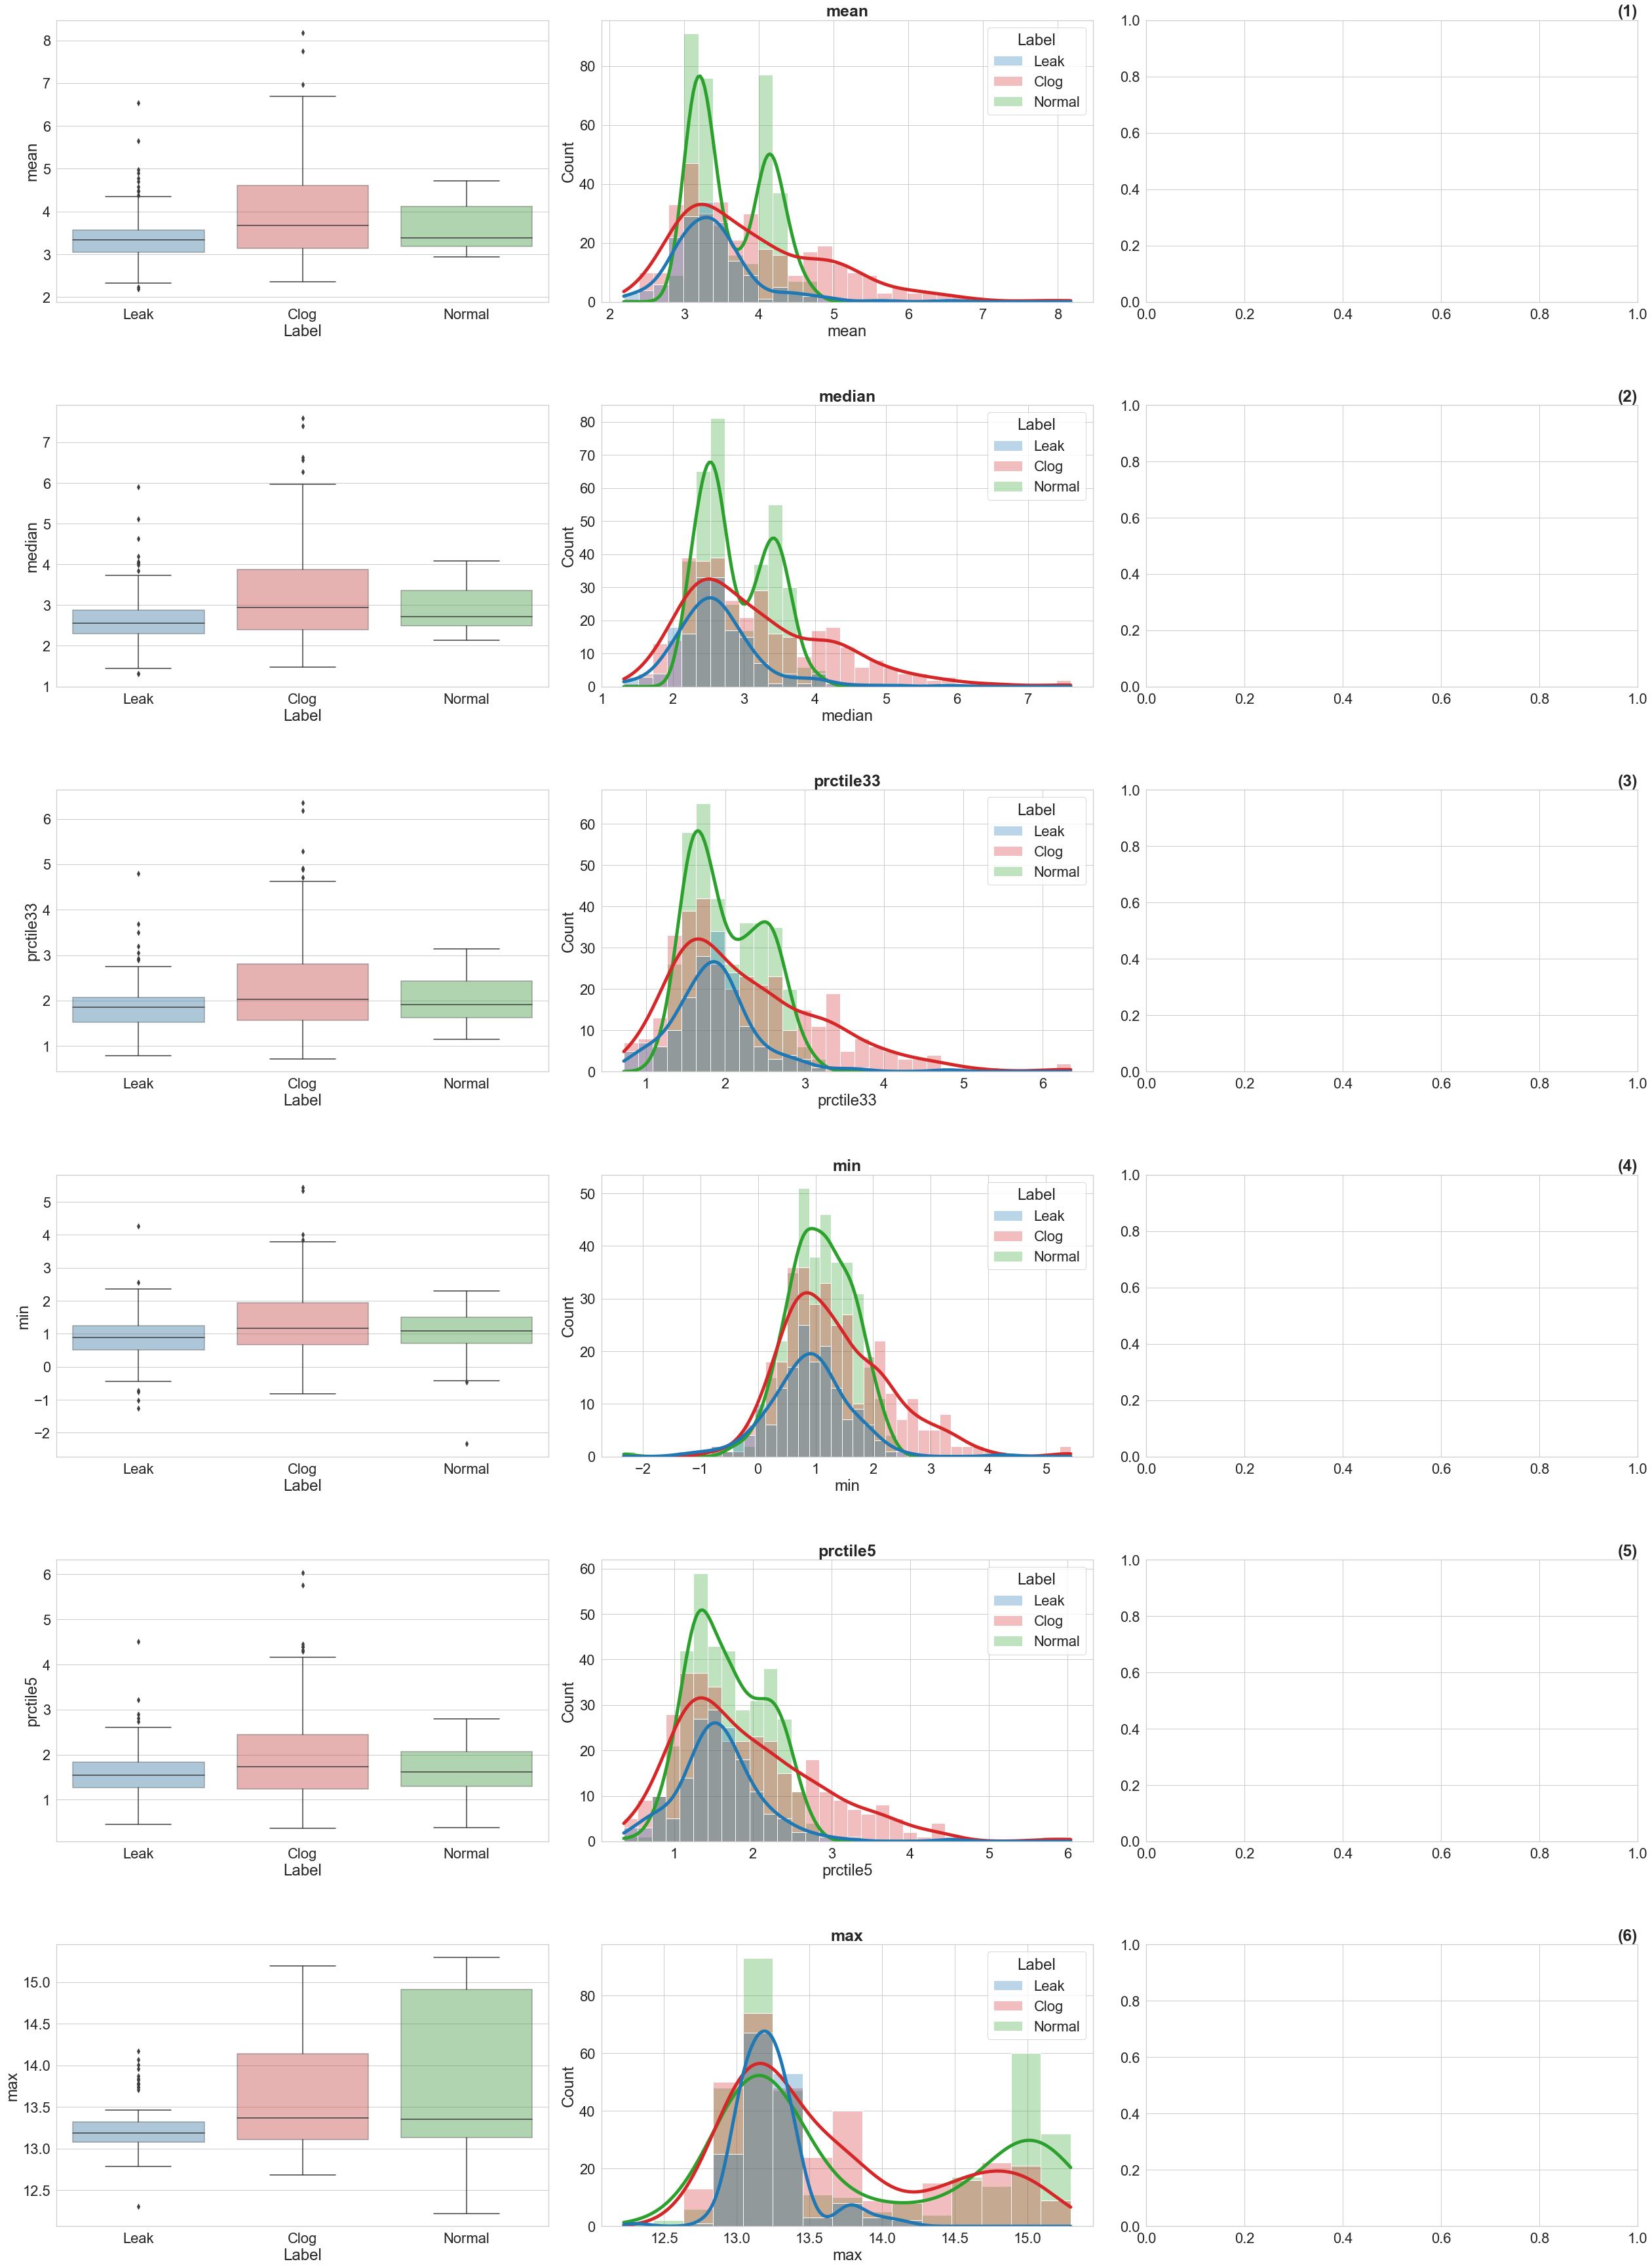

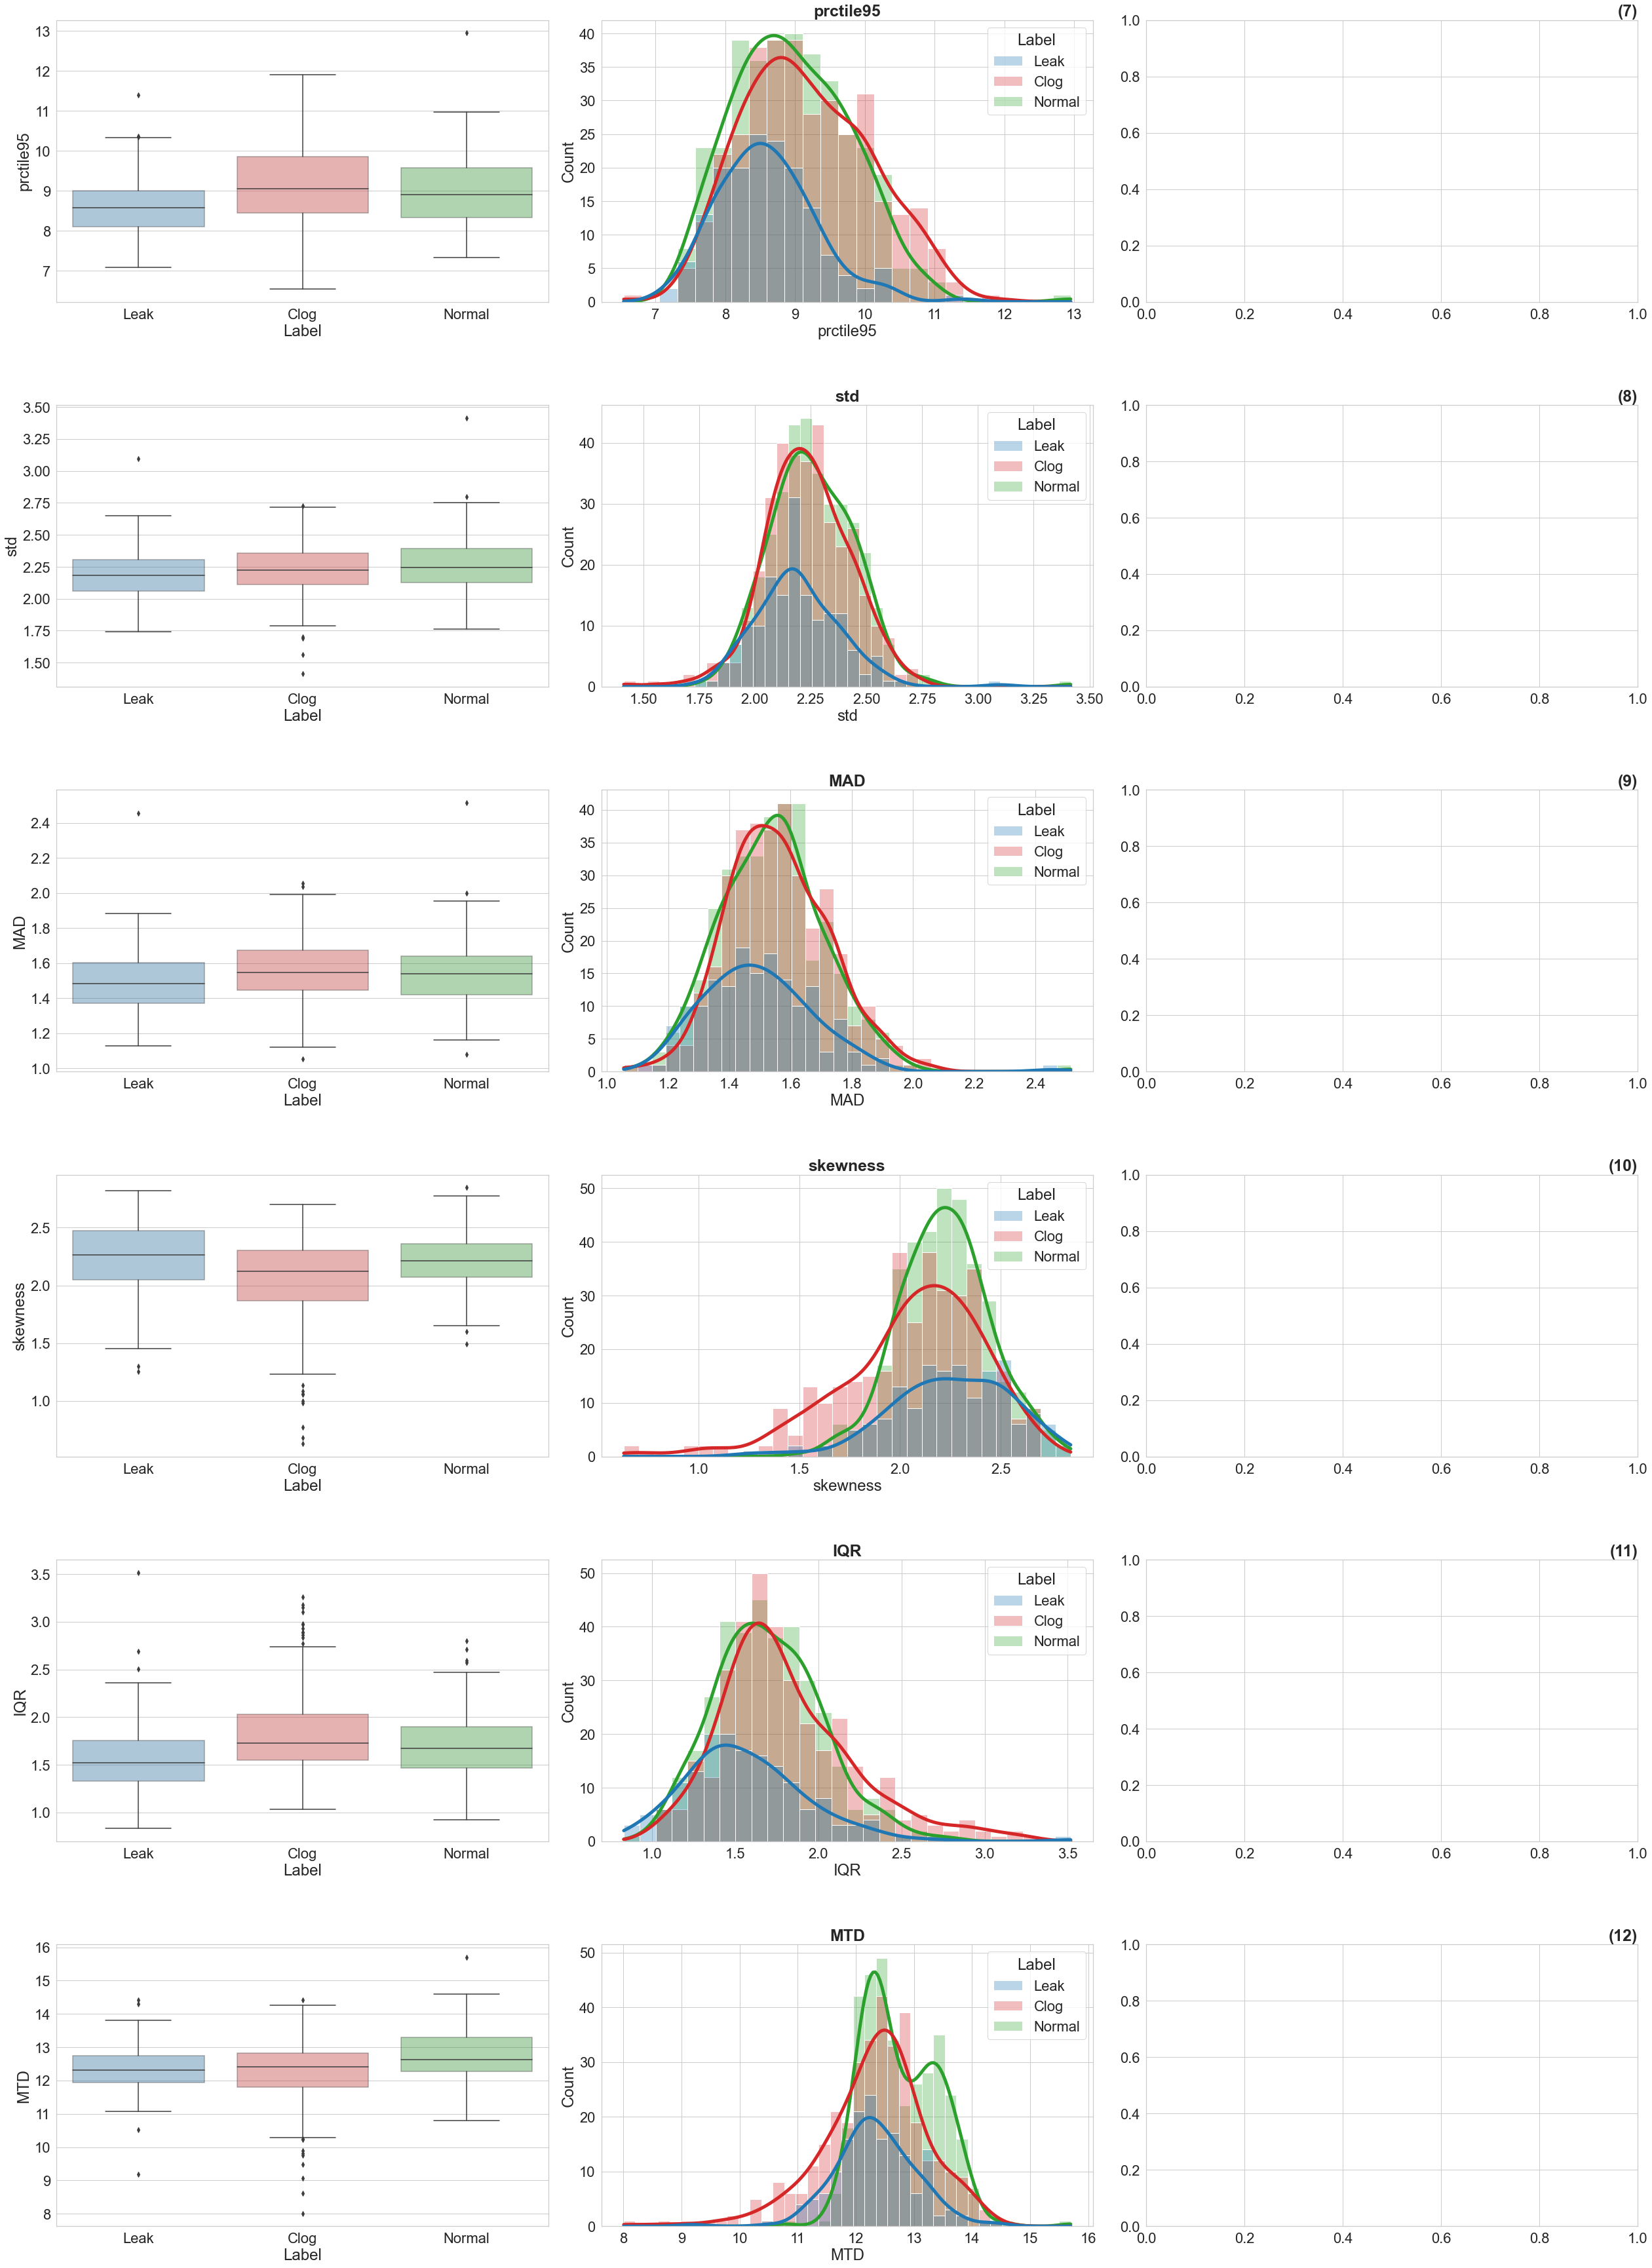

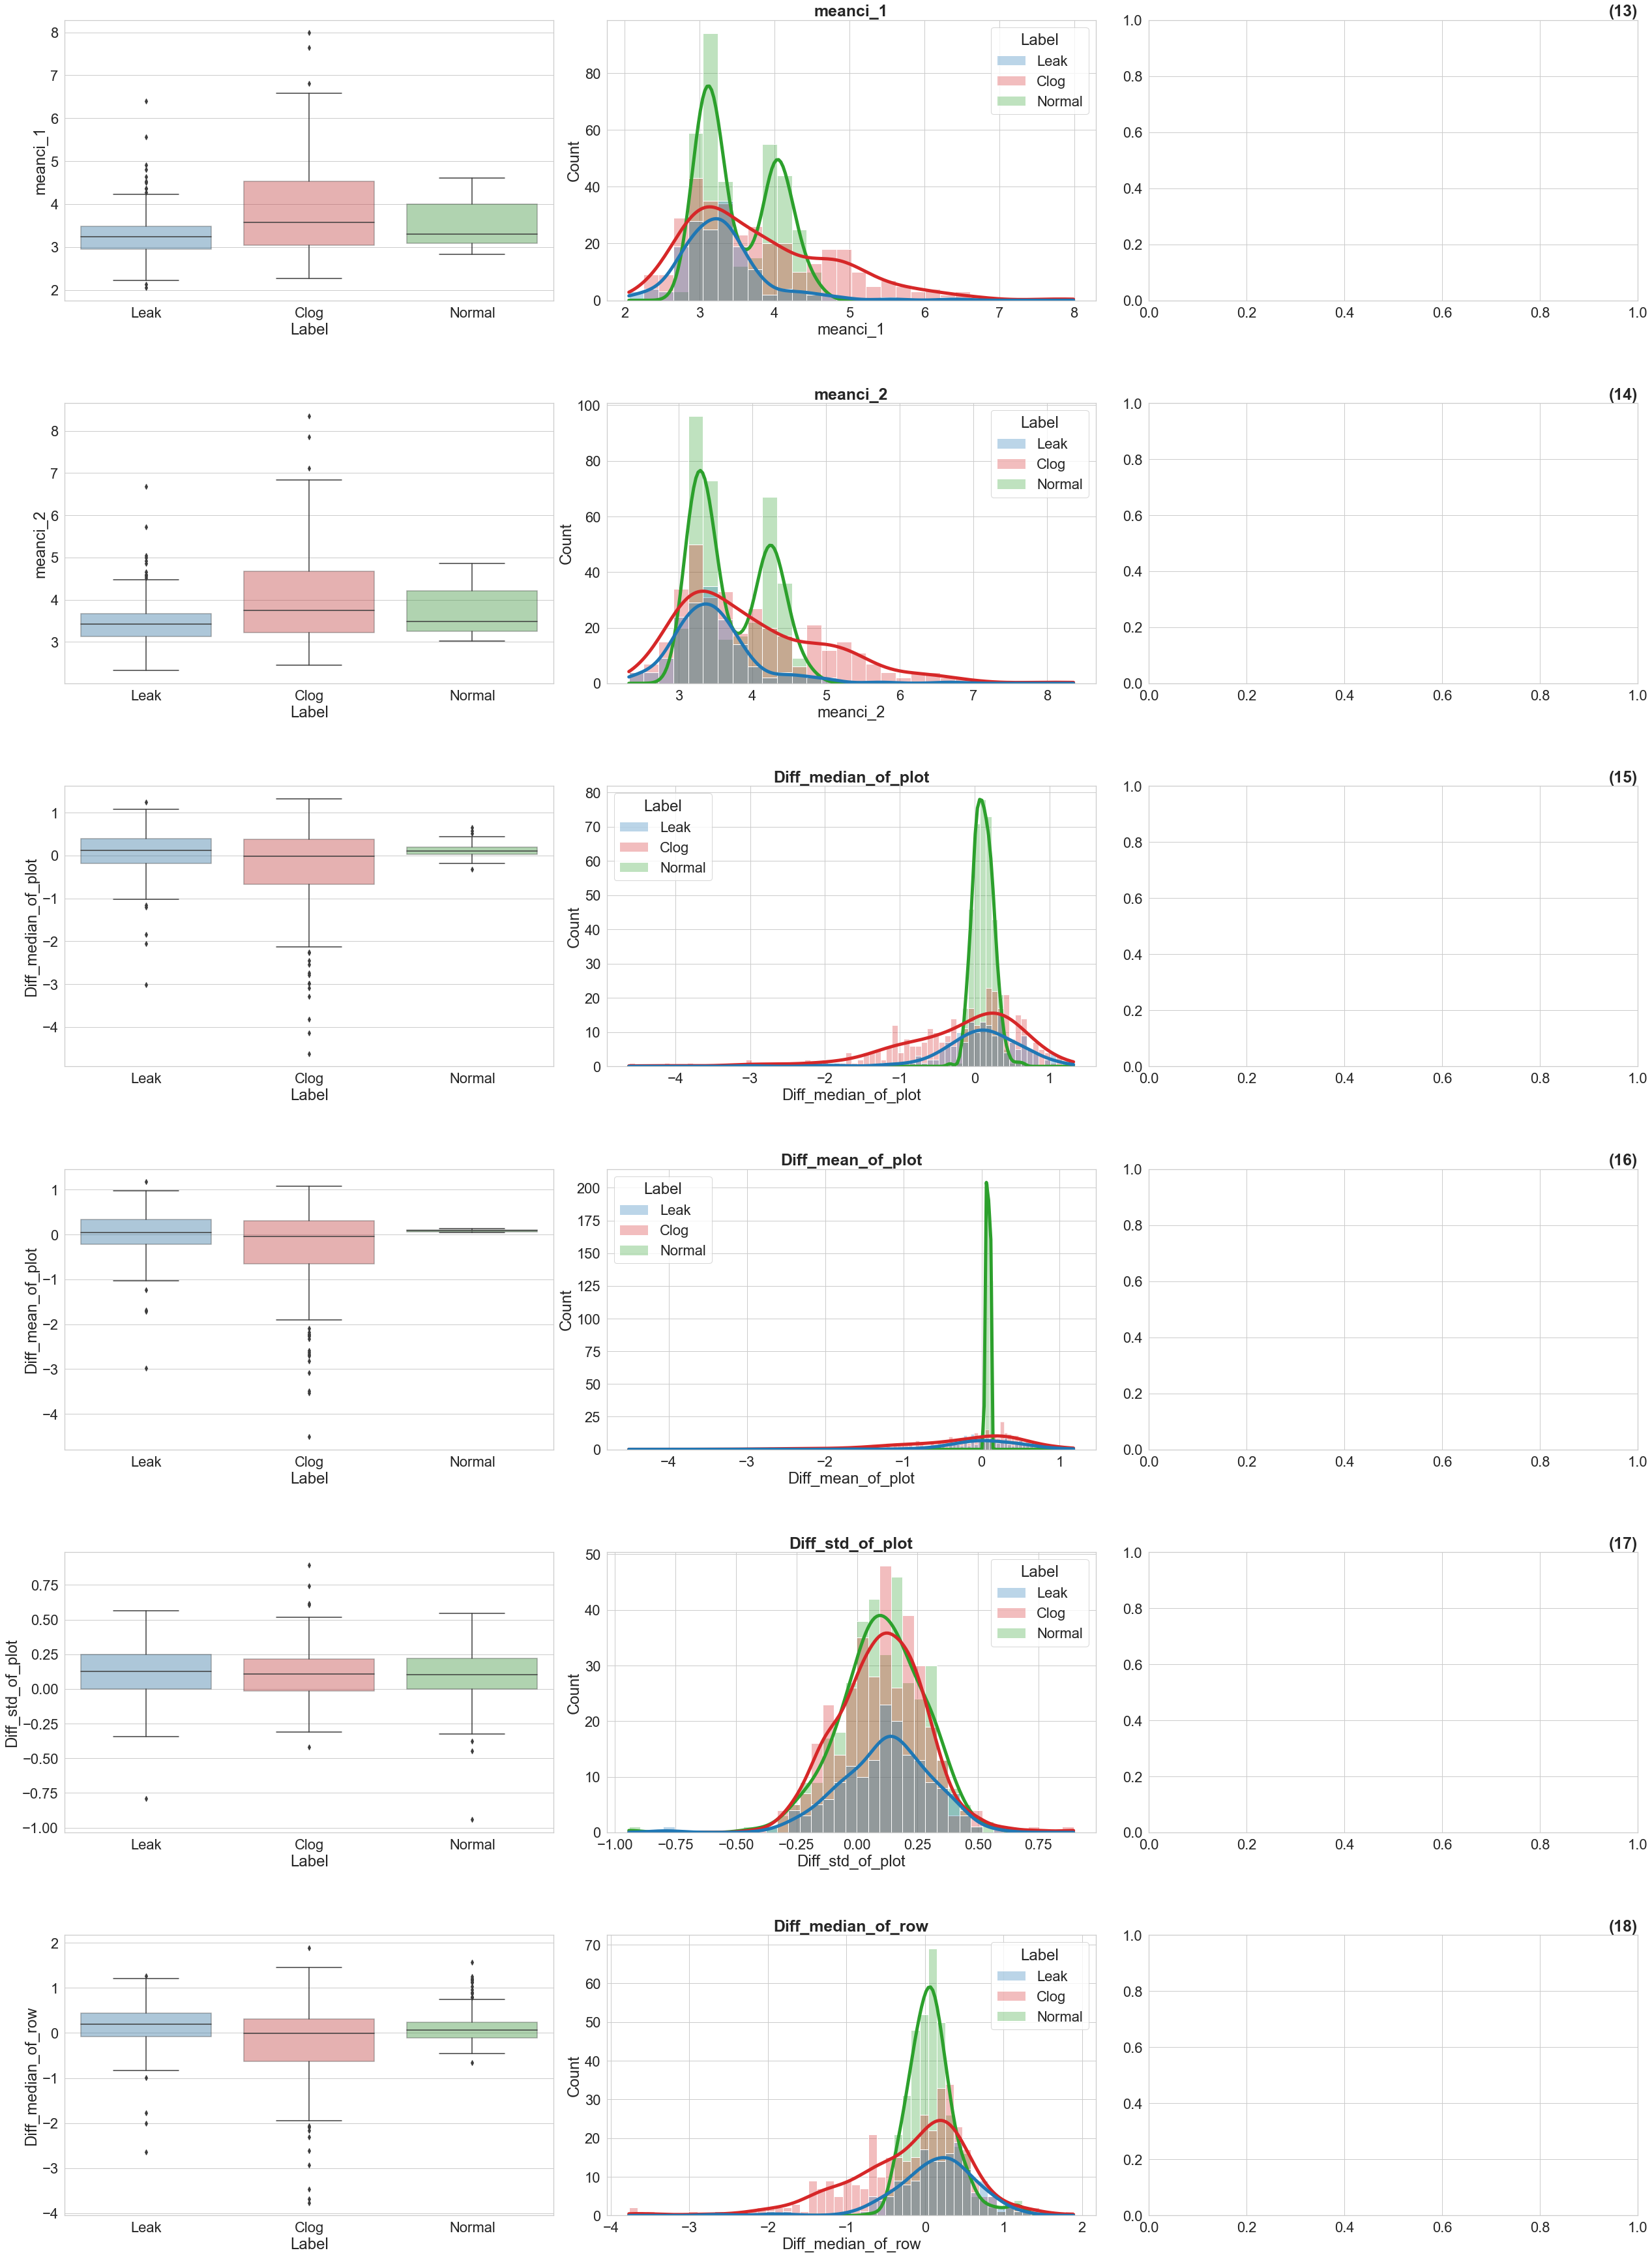

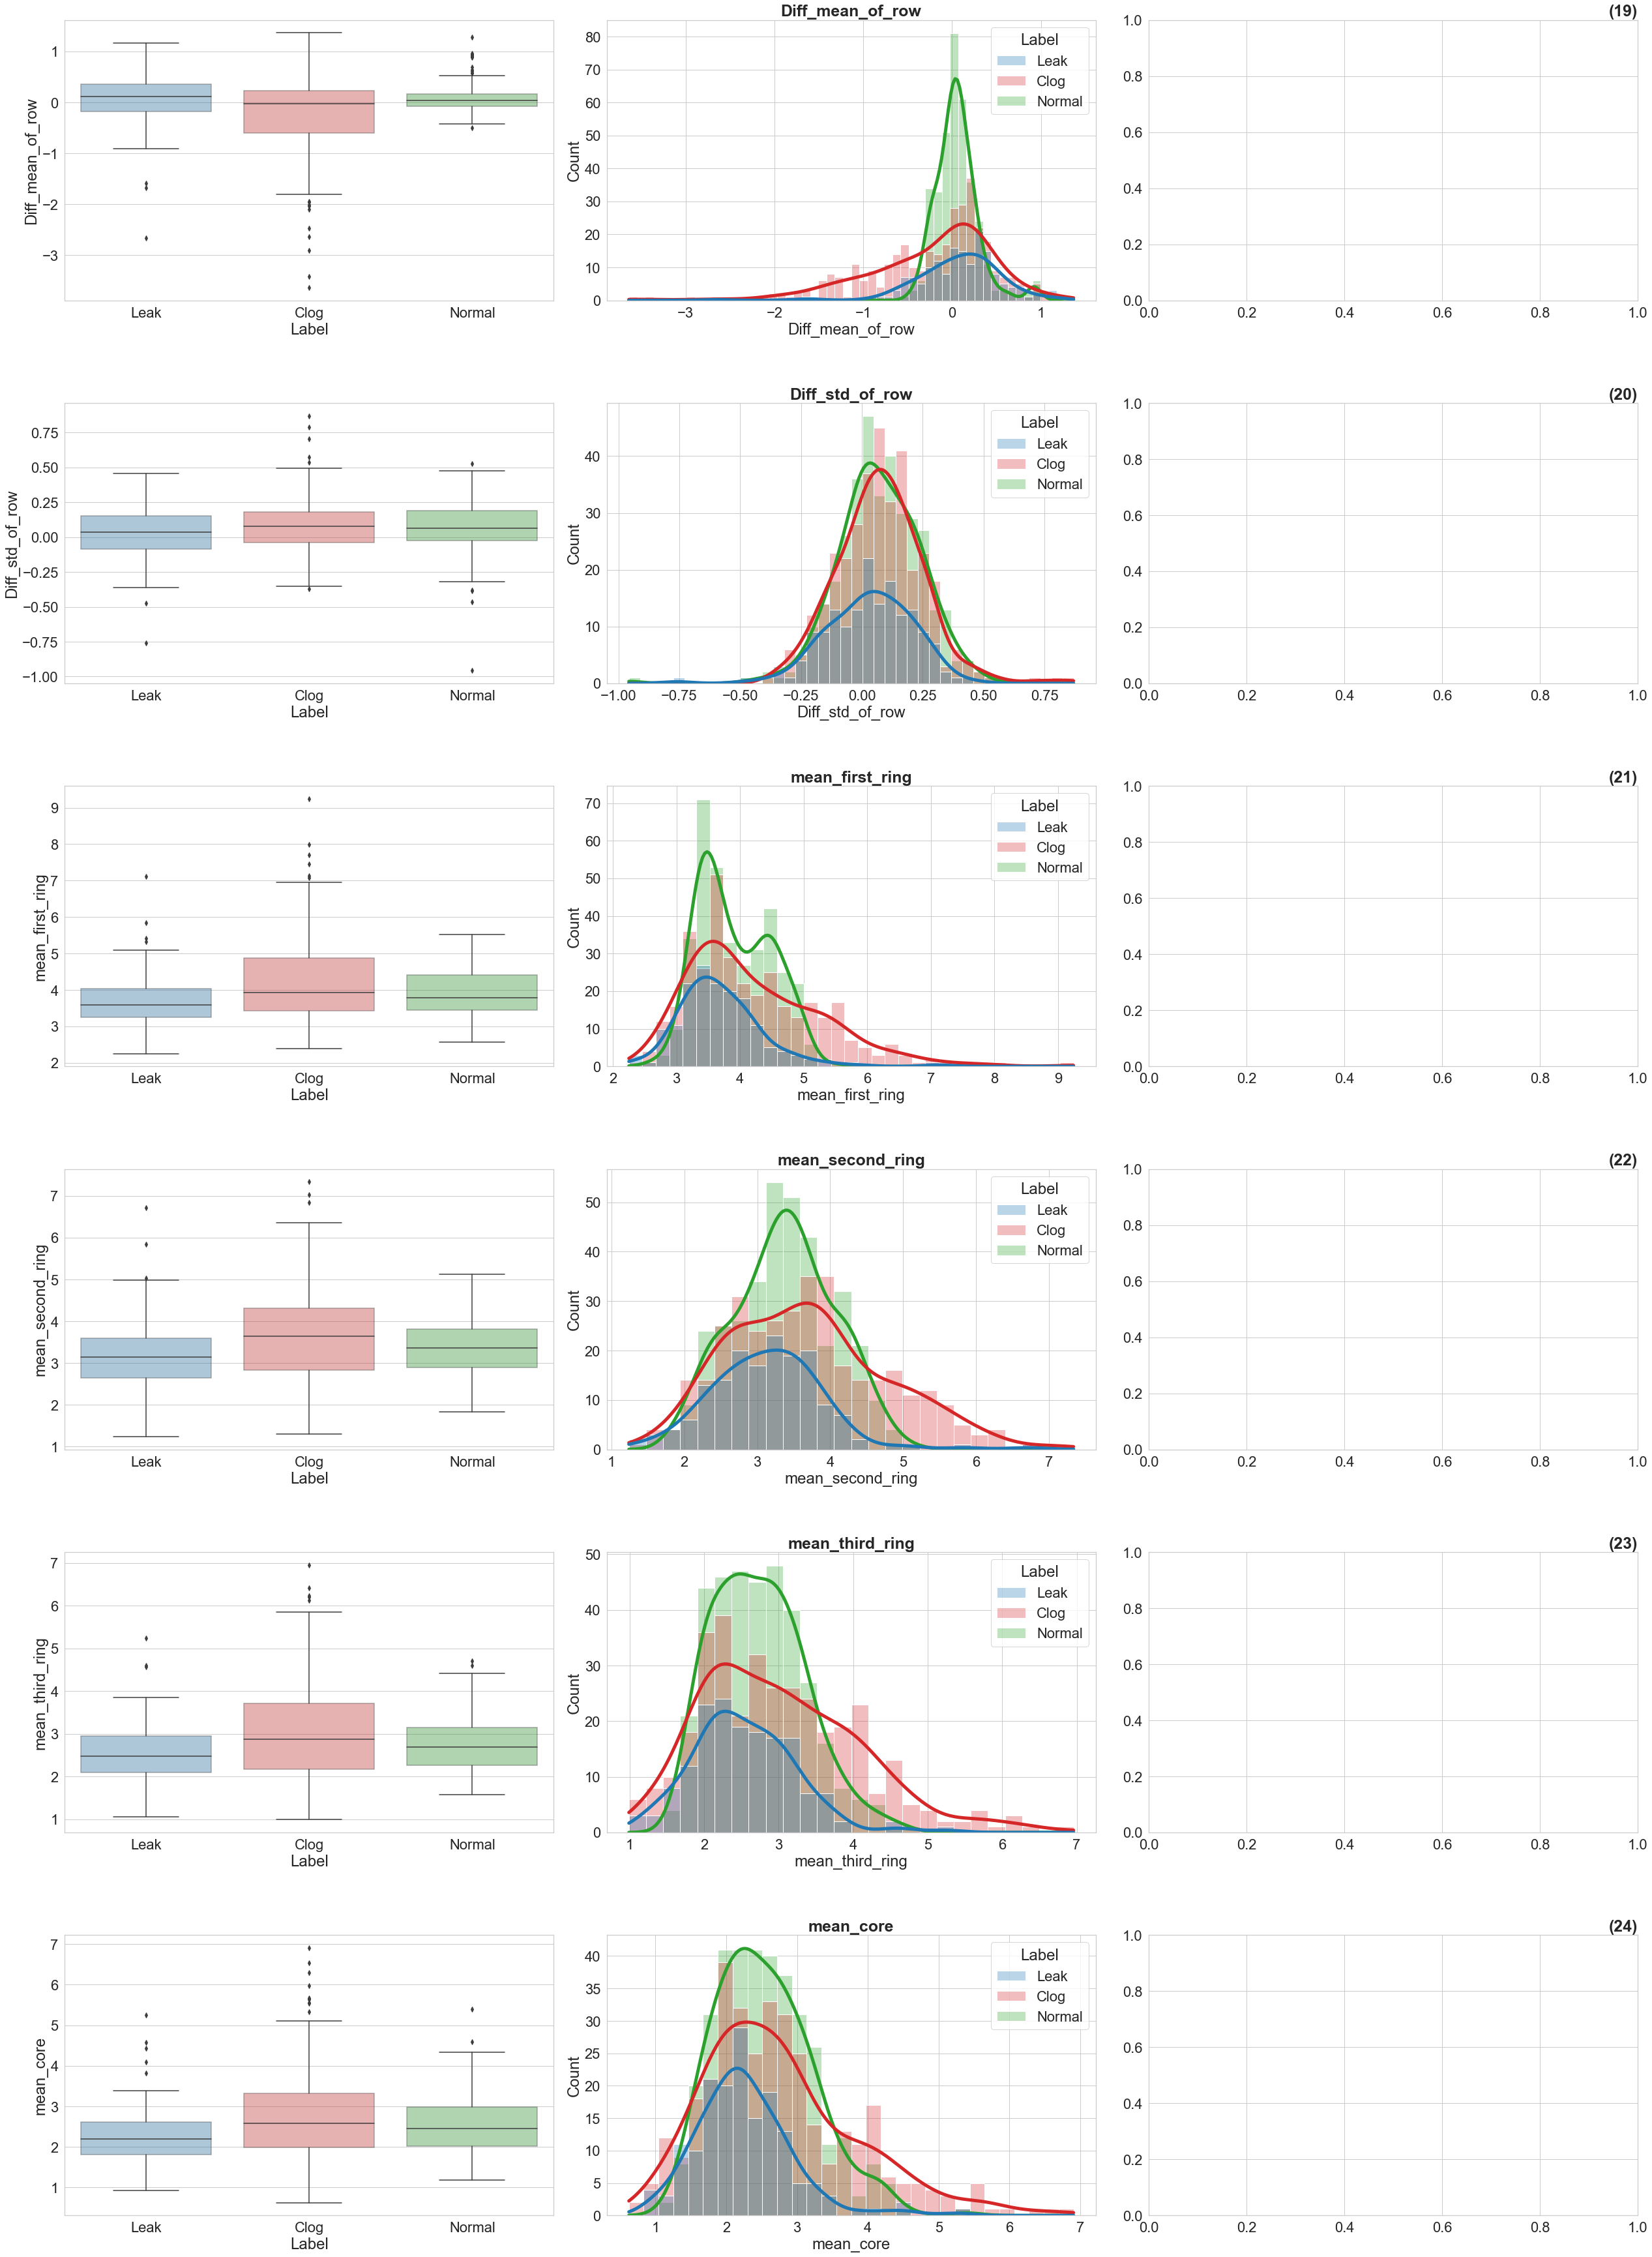

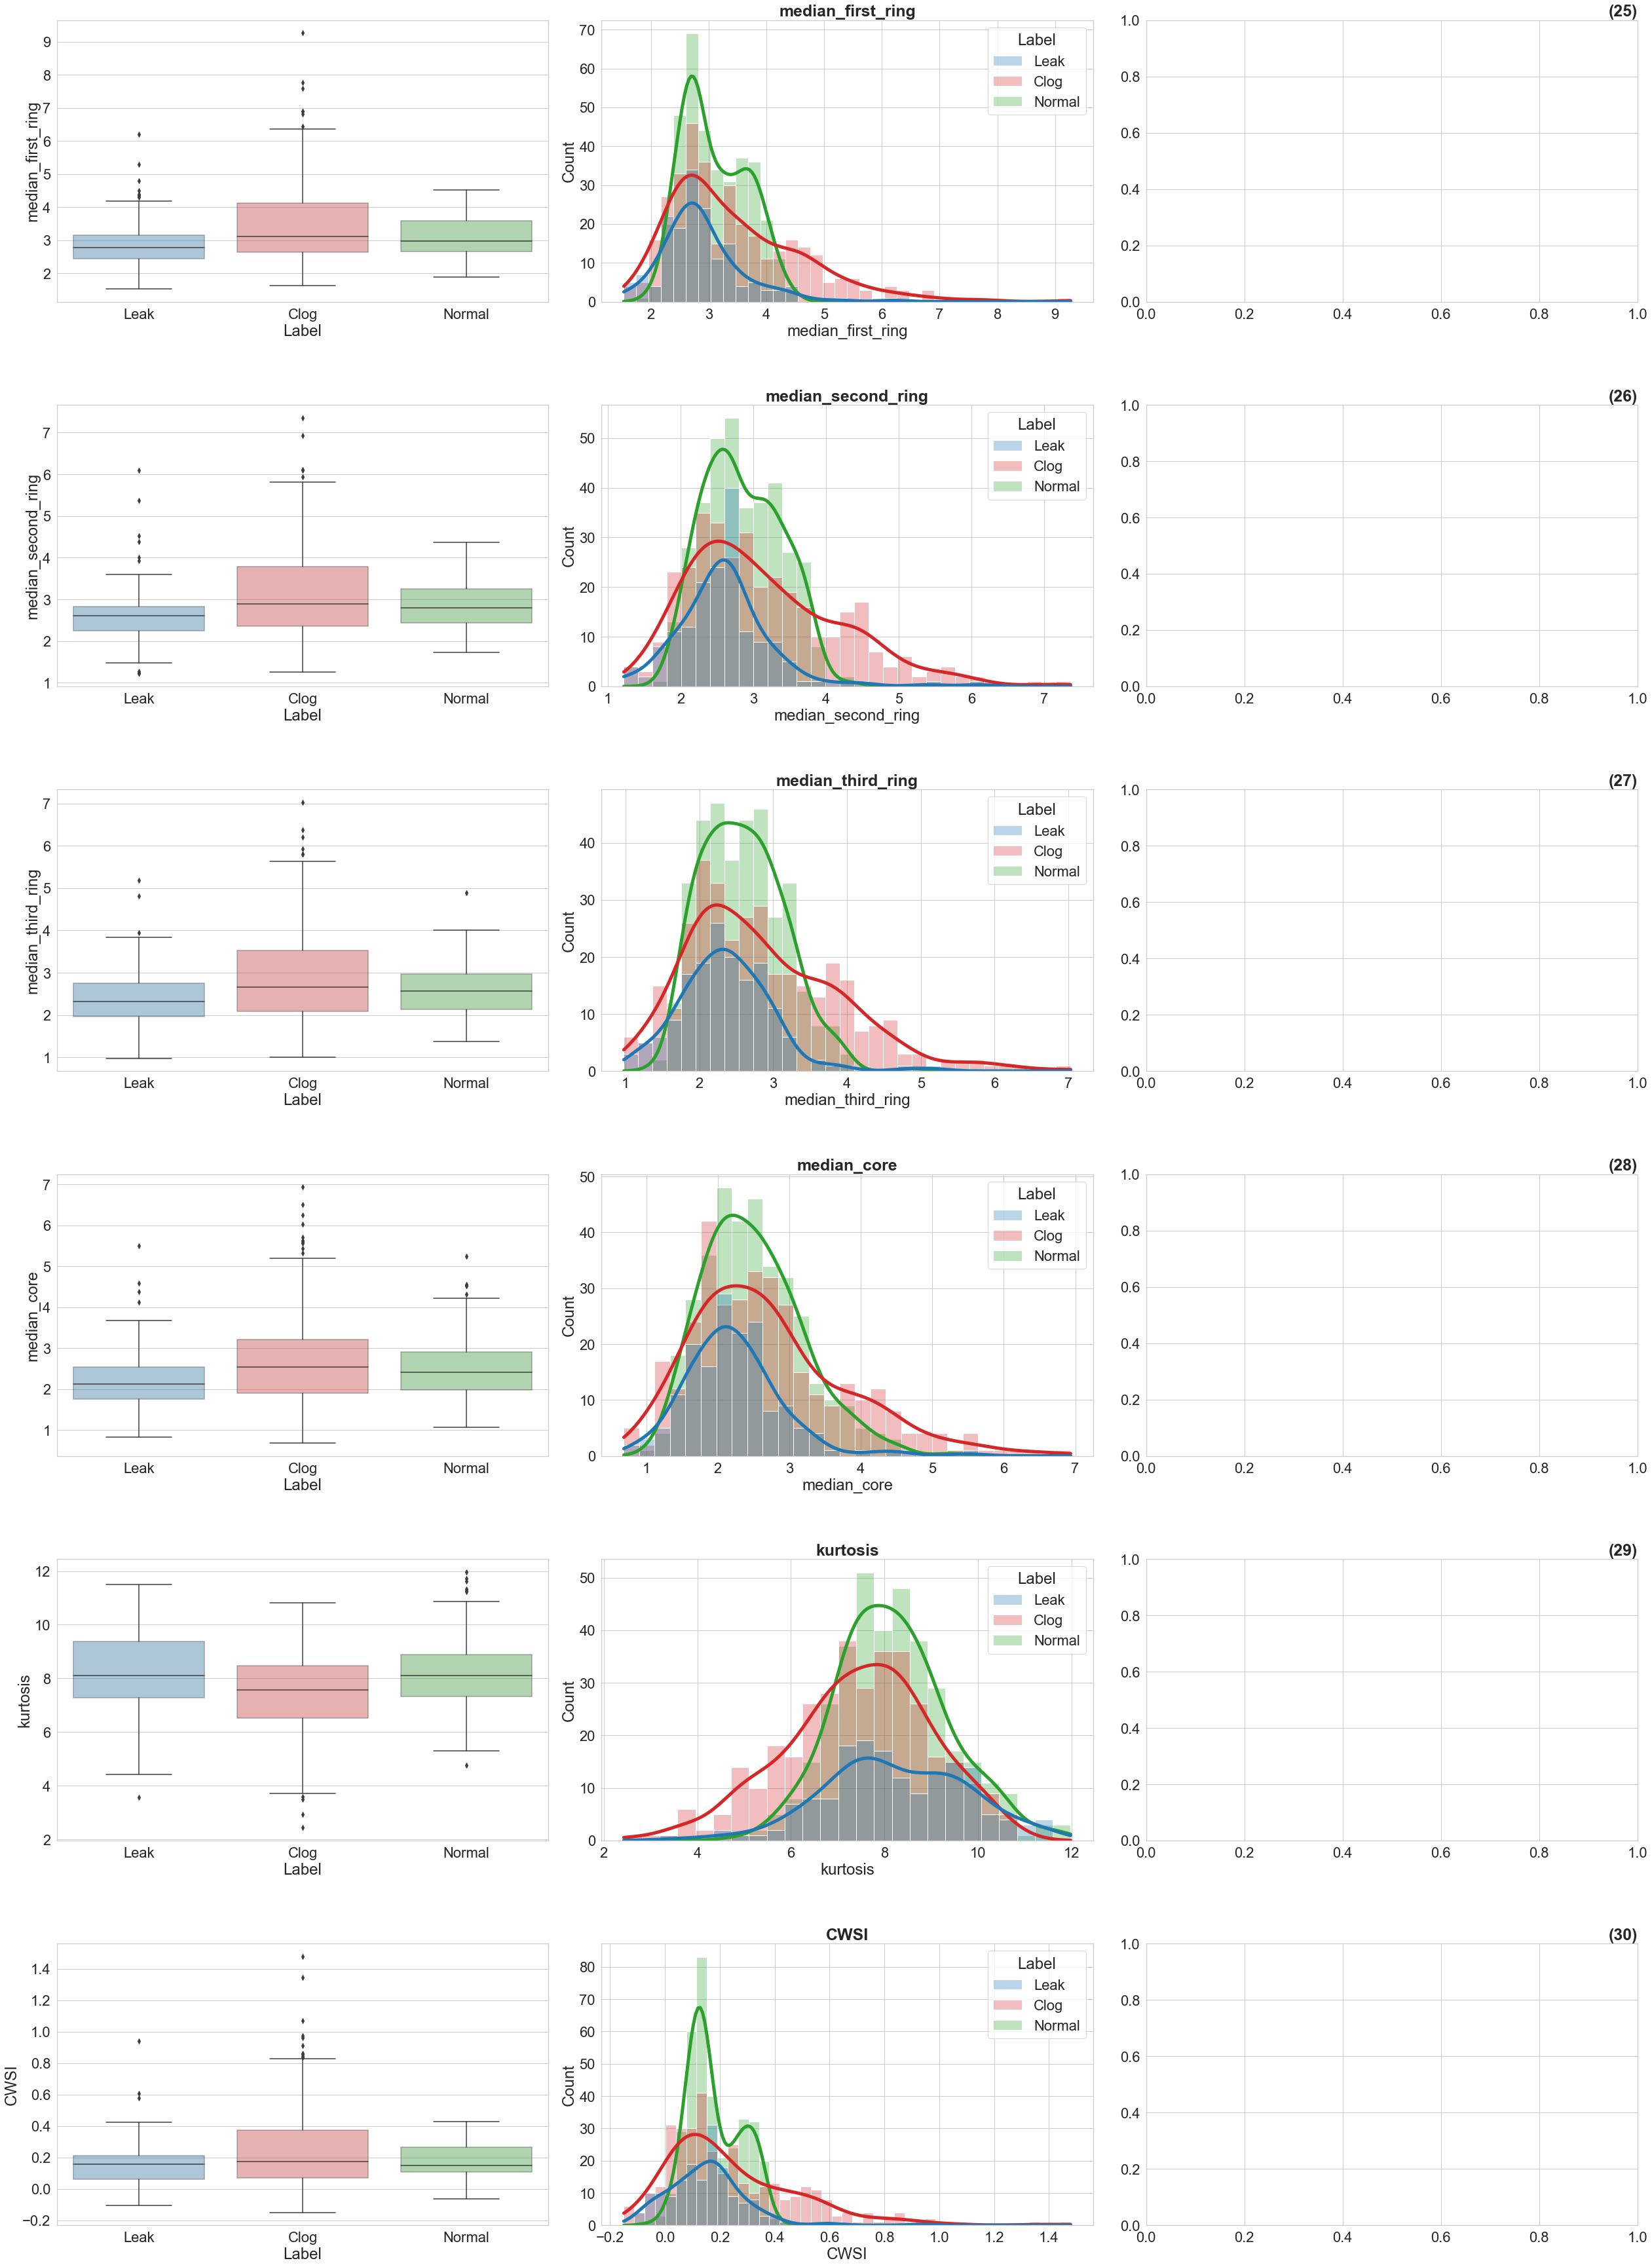

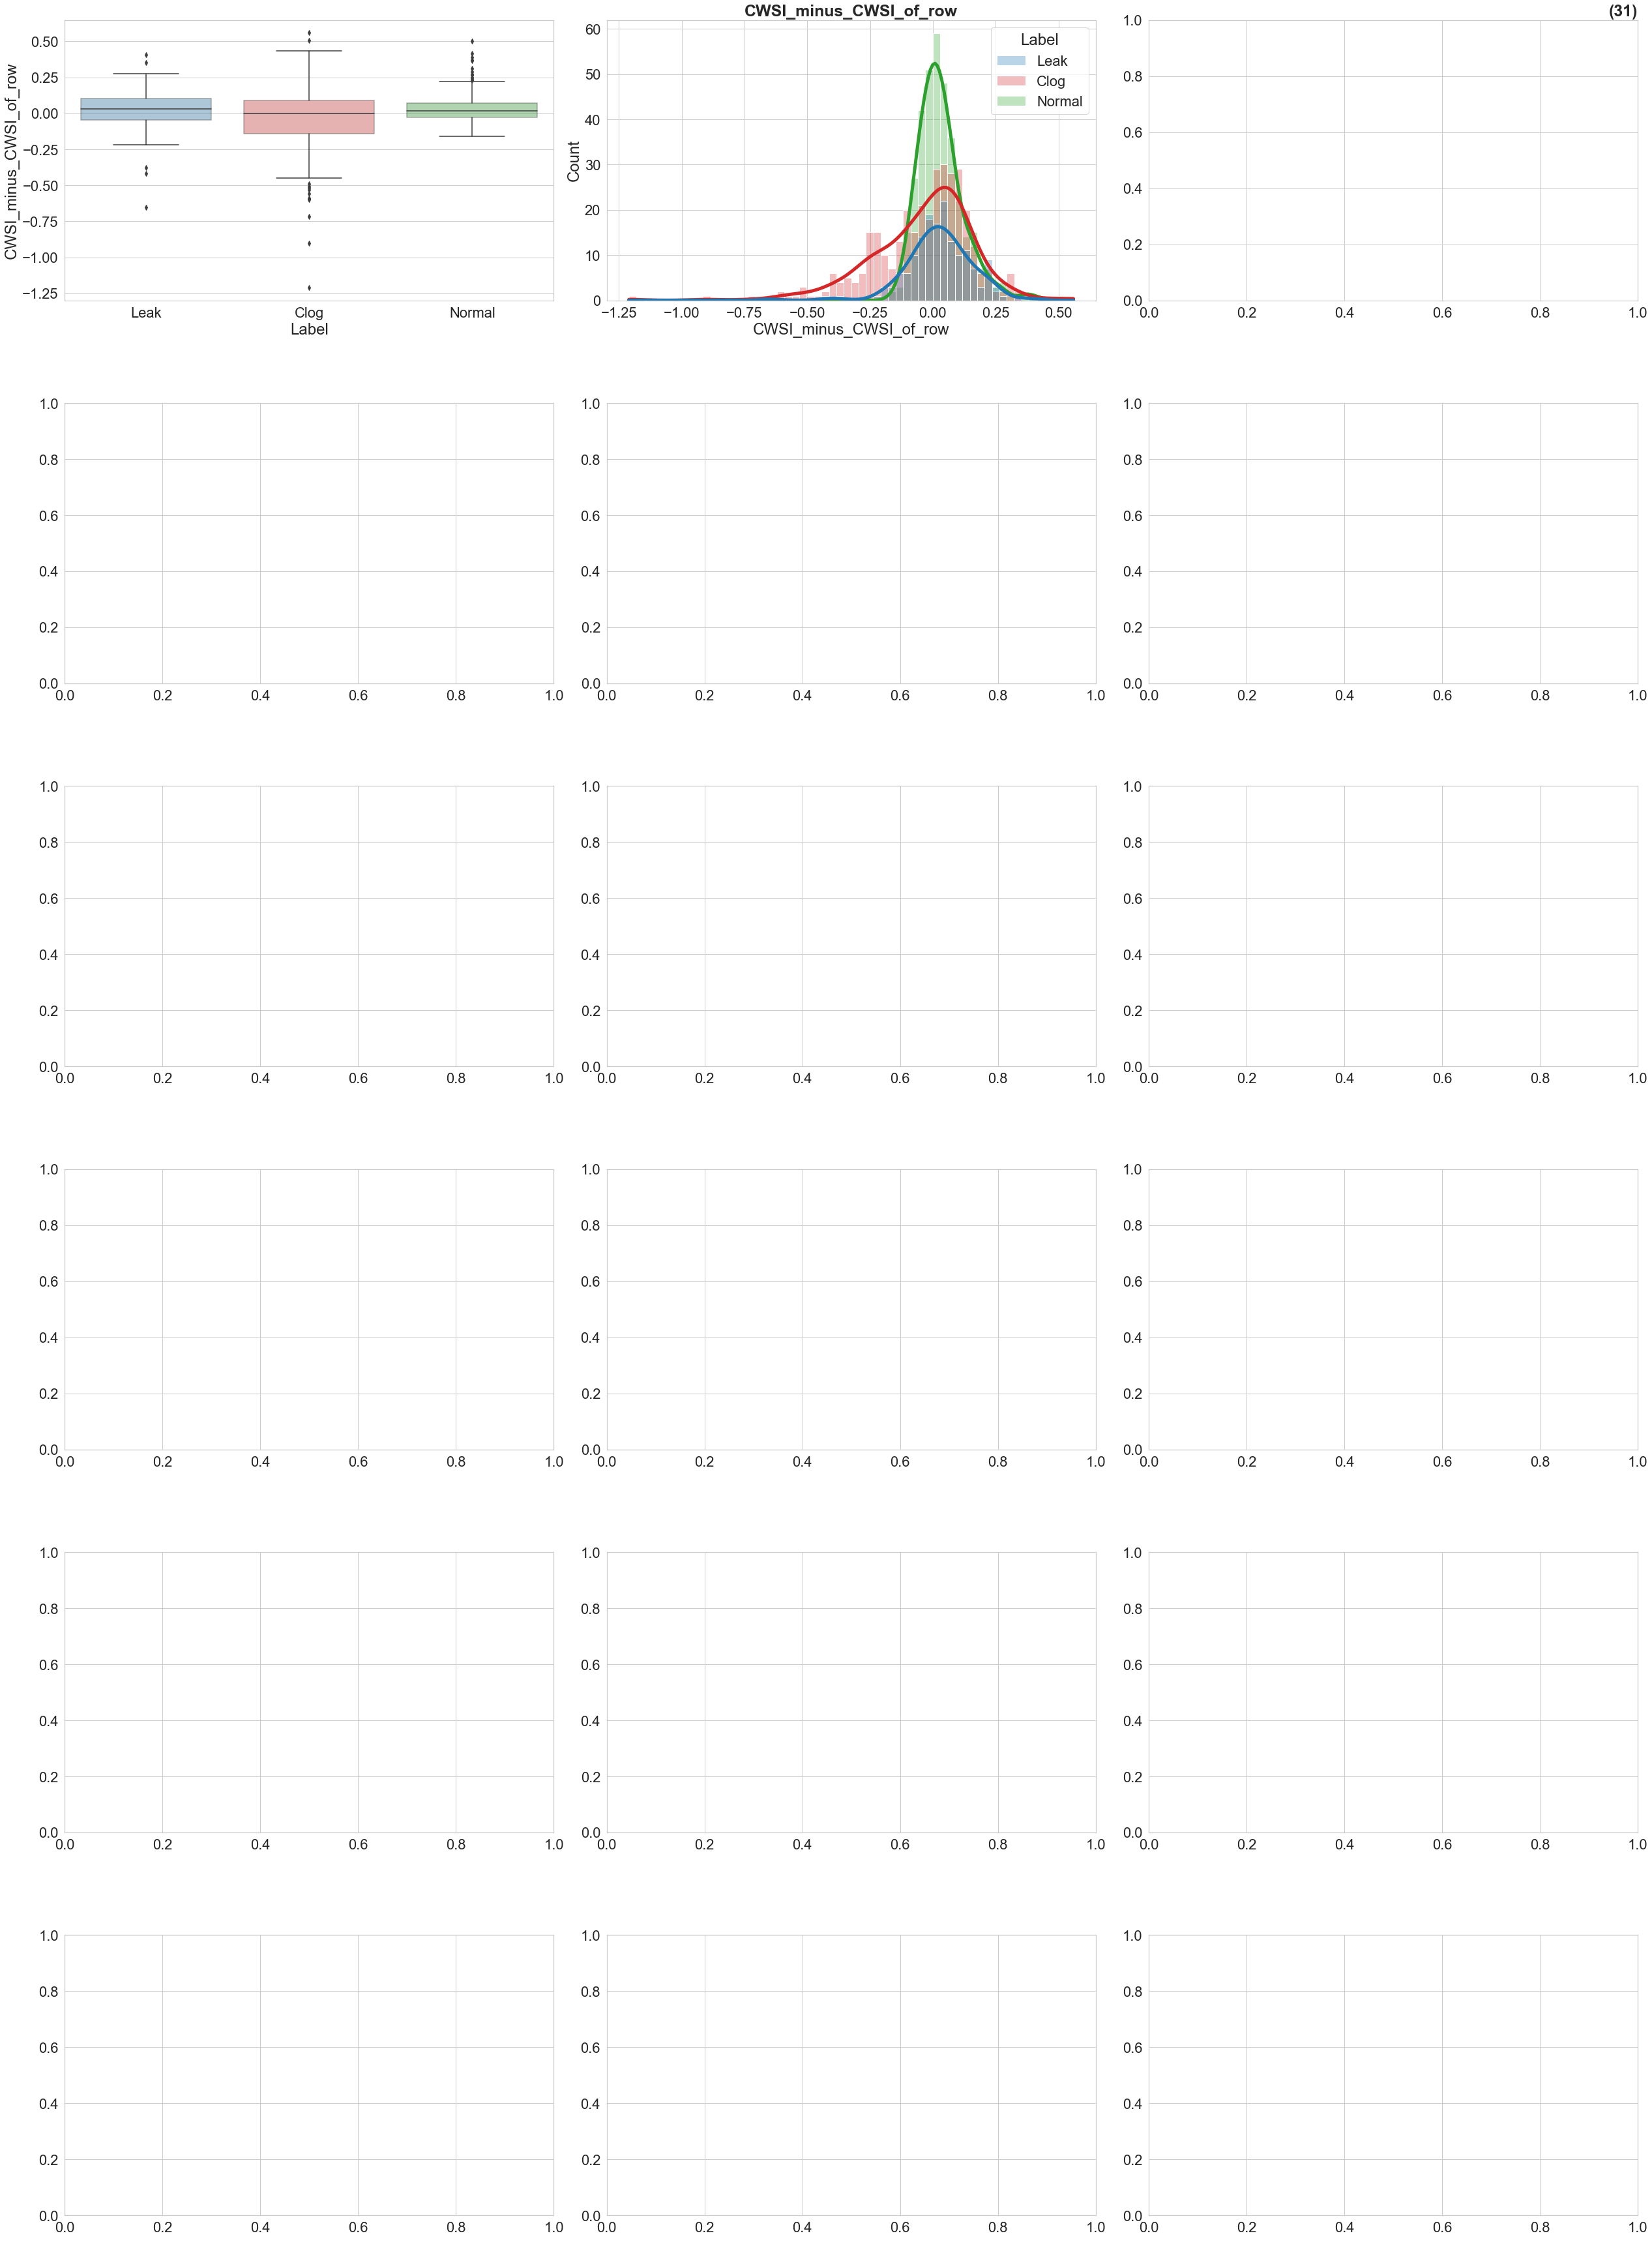

In [77]:
disp_hue_regplot(Data)


# Outliers

## Kemda & Lavi

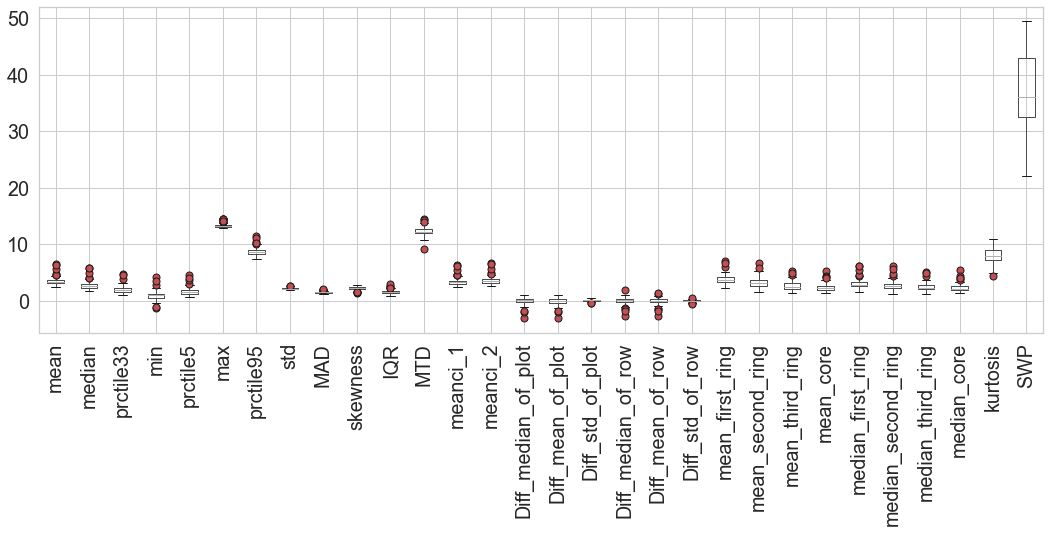

In [21]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")

df_to_exclude_outliers=Data[predictors].copy(True)
flierprops = dict(marker='o', markerfacecolor='r', markersize=7,linestyle='none', markeredgecolor='k');
df_to_exclude_outliers.boxplot(figsize=(18,6),flierprops=flierprops) ;
plt.xticks(rotation=90);

In [22]:
import collections
df_without_outliters=Data.copy(True)

outlieres = []
for i in predictors: 
    Q1 = np.quantile(Data[i],0.25)
    Q3 = np.quantile(Data[i],0.75)
    IQR = Q3 - Q1
    lower, upper = Q1-1.5*IQR, Q3+1.5*IQR
    outlieres.append(df_without_outliters[df_without_outliters[i] < lower].index)
    outlieres.append(df_without_outliters[df_without_outliters[i] > upper].index)

flat_list = [item for sublist in outlieres for item in sublist]
Counter = collections.Counter(flat_list)
outlieres_to_drop={x: count for x, count in Counter.items() if count >= 1}
print('indices to drop:',len(outlieres_to_drop.keys()))

df_without_outliters = df_without_outliters.drop(outlieres_to_drop.keys())
df_without_outliters.to_excel("data_sdeDavid_without_outlires.xlsx") 

indices to drop: 24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Label                   763 non-null    object 
 1   Plot                    763 non-null    object 
 2   Site_Name               763 non-null    object 
 3   mean                    763 non-null    float64
 4   min                     763 non-null    float64
 5   prctile5                763 non-null    float64
 6   max                     763 non-null    float64
 7   prctile95               763 non-null    float64
 8   std                     763 non-null    float64
 9   MTD                     763 non-null    float64
 10  median                  763 non-null    float64
 11  skewness                763 non-null    float64
 12  kurtosis                763 non-null    float64
 13  IQR                     763 non-null    float64
 14  MAD                     763 non-null    fl

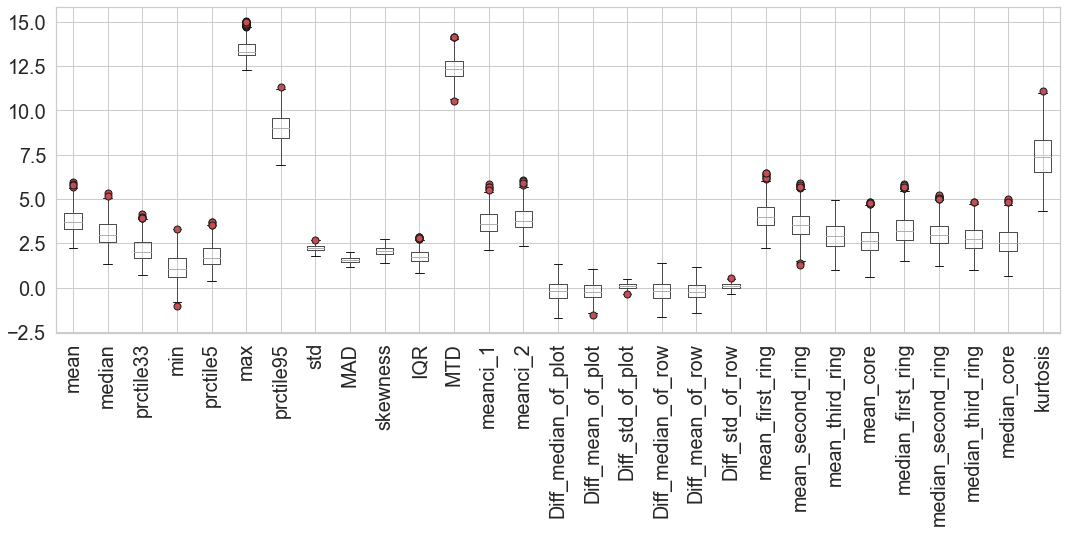

In [18]:
df_out = pd.read_excel(os.path.join(os.getcwd(), 'data_sdeDavid_without_outlires.xlsx')).iloc[: , 1:]
# df_out1.dropna(how='any')
flierprops = dict(marker='o', markerfacecolor='r', markersize=7,linestyle='none', markeredgecolor='k')
df_out[predictors].boxplot(figsize=(18,6),flierprops=flierprops) 
plt.xticks(rotation=90)
df_out.info()

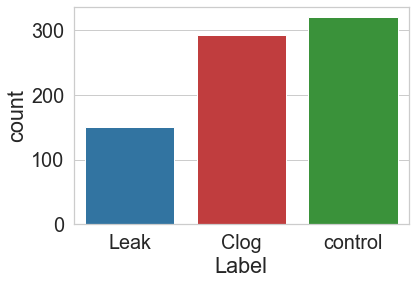

control    320
Clog       292
Leak       151
Name: Label, dtype: int64


In [21]:
sns.countplot(data=df_out, x="Label",palette={"Leak":"tab:blue","Clog":"tab:red","control":"tab:green"})

plt.show()
s = df_out['Label'].value_counts()
print(s)